# Learning gradient descent

In [102]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm # color map
from sympy import symbols, diff
from math import log
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

%matplotlib inline

## Creating Gradient Descent Graph 2D

## $$f(x) = x^5 - 2x^4 + 2$$

In [3]:
def f(x):
    return x**5 - 2*x**4 + 2

def df(x):
    return 5*x**4 - 8*x**3

In [4]:
x_1 = np.linspace(start=-2.5, stop=2.5, num=100)

prev = 0
new = -0.5
eta = 0.005
points_list = []
for i in range(40):
    points_list.append(new)
    prev = new
    gradient = df(prev)
    new = prev - eta * gradient

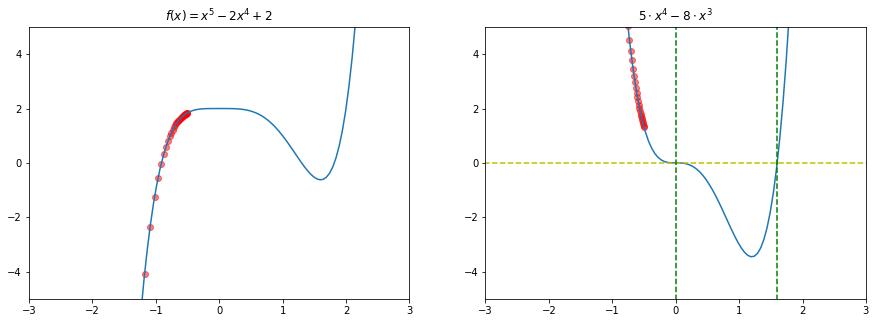

In [5]:
plt.figure(figsize=[15,5])

plt.subplot(1,2,1)
plt.xlim(-3,3)
plt.ylim(-5,5)
plt.plot(x_1, f(x_1))
plt.title("$f(x) = x^5 - 2x^4 + 2$")
values = np.array(points_list)
plt.scatter(points_list, f(values), color='red', alpha=0.5)

plt.subplot(1,2,2)
plt.xlim(-3,3)
plt.ylim(-5,5)
plt.title("$5 \cdot x^4 - 8 \cdot x^3$")
plt.plot(x_1, df(x_1))
plt.axhline(y=0, xmin=-3, xmax=3, linestyle="--", color="y")
plt.axvline(x=0, ymin=-5, ymax=5, linestyle="--", color="g")
plt.axvline(x=1.6, ymin=-5, ymax=5, linestyle="--", color="g")
plt.scatter(points_list, df(values), color='red', alpha=0.5)
plt.show()

## Influence of incorrectly selected step of size (eta)

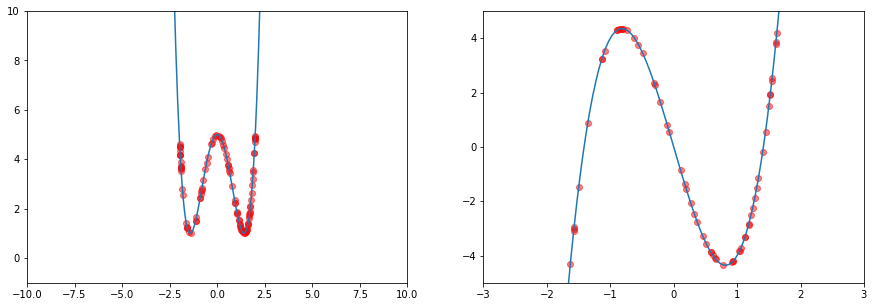

In [6]:
def g(x):
    return pow(x, 4) - 4 * pow(x, 2) + 5

def dg(x):
    return 4 * pow(x, 3) - 8 * x

x_1 = np.linspace(start=-12.5, stop=12.5, num=500)

prev = 0
new = 1.5
eta = 0.25
points_list = []
for i in range(100):
    points_list.append(new)
    prev = new
    gradient = dg(prev)
    new = prev - eta * gradient
    
plt.figure(figsize=[15,5])
plt.subplot(1,2,1)
plt.xlim(-10,10)
plt.ylim(-1,10)
plt.plot(x_1, g(x_1))
values = np.array(points_list)
plt.scatter(points_list, g(values), color='red', alpha=0.5)

plt.subplot(1,2,2)
plt.xlim(-3,3)
plt.ylim(-5,5)
plt.plot(x_1, dg(x_1))
plt.scatter(points_list, dg(values), color='red', alpha=0.5)
plt.show()

# Example 4 - Data Viz with 3D Charts

## Minimise $$f(x,y) = \frac{1}{3^{-x^2-y^2}+1}$$

# OR

## Minimise $$f(x,y) = \frac{1}{r+1}$$ where $r$ is $3^{-x^2-y^2}$

In [7]:
def f(x, y):
    r = 3**(-x**2 - y**2)
    return 1 / (r + 1)

x_4 = np.linspace(start=-2, stop=2, num=200)
y_4 = np.linspace(start=-2, stop=2, num=200)

x_4, y_4 = np.meshgrid(x_4, y_4)

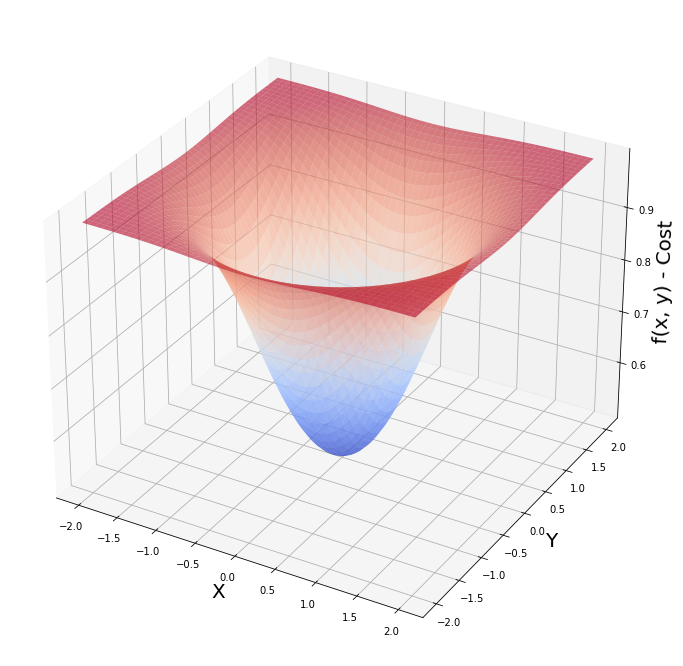

In [8]:
fig = plt.figure(figsize=[16, 12])
ax = fig.gca(projection='3d')
ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('f(x, y) - Cost', fontsize=20)
ax.plot_surface(x_4, y_4, f(x_4, y_4), cmap=cm.coolwarm, alpha=0.6)

## Partial derivatives and symbolic computation

## $$\frac {\partial f}{\partial x} = \frac {2 \cdot 3^{-x^{2} - y^{2}} \cdot x \cdot \ln(3)}{\left(3^{-x^2 - y^2} + 1\right)^2}$$

## $$\frac {\partial f}{\partial y} = \frac {2 \cdot 3^{-x^{2} - y^{2}} \cdot y \cdot \ln(3)}{\left(3^{-x^2 - y^2} + 1\right)^2}$$

In [9]:
a, b = symbols('x, y')
print('Our cost function f(x, y) is: ', f(a, b))
print('Partial derivative wrt x is: ', diff(f(a, b), a))
print('Partial derivative wrt y is: ', diff(f(a, b), b))

def fpx(x, y):
    return 2*3**(-x**2 - y**2)*x*log(3)/(3**(-x**2 - y**2) + 1)**2

def fpy(x, y):
    return 2*3**(-x**2 - y**2)*y*log(3)/(3**(-x**2 - y**2) + 1)**2

Our cost function f(x, y) is:  1/(3**(-x**2 - y**2) + 1)
Partial derivative wrt x is:  2*3**(-x**2 - y**2)*x*log(3)/(3**(-x**2 - y**2) + 1)**2
Partial derivative wrt y is:  2*3**(-x**2 - y**2)*y*log(3)/(3**(-x**2 - y**2) + 1)**2


## Batch Gradient Descent without using SymPy

In [10]:
# import time
# start_time = time.time()
# multiplier = 0.1
# max_iter = 200
# params = np.array([1.8, 1.0])

# gradient_x = 0
# gradient_y = 0

# li = []
# for n in range(max_iter+1):
#     gradients = np.array([fpx(params[0], params[1]), fpy(params[0], params[1])])
#     params = params - multiplier * gradients
#     li.append(params)
# print("Values in gradient array", gradients)
# print("Min occurs at x value of: ", params[0])
# print("Min occurs at y value of: ", params[1])
# print("The cost is: ", f(params[0], params[1]))
# print("--- %s seconds ---" % (time.time() - start_time))

## Batch Gradient Descent using SymPy

In [11]:
# import time
# start_time = time.time()
# multiplier = 0.1
# max_iter = 200
# params = np.array([1.8, 1.0])

# gradient_x = 0
# gradient_y = 0

# li = []
# for n in range(max_iter+1):
#     gradient_x = diff(f(a,b), a).evalf(subs={a:params[0], b:params[1]})
#     gradient_y = diff(f(a,b), b).evalf(subs={a:params[0], b:params[1]})
#     gradients = np.array([gradient_x, gradient_y])
#     params = params - multiplier * gradients
#     li.append(params)
# print("Values in gradient array", gradients)
# print("Min occurs at x value of: ", params[0])
# print("Min occurs at y value of: ", params[1])
# print("The cost is: ", f(params[0], params[1]))
# print("--- %s seconds ---" % (time.time() - start_time))

## Creating gradient descent graph 3D

In [12]:
multiplier = 0.1
max_iter = 200
params = np.array([1.8, 1.0])

values_array = params.reshape(1,2)
print(values_array)

li = []
for n in range(max_iter+1):
    gradients = np.array([fpx(params[0], params[1]), fpy(params[0], params[1])])
    params = params - multiplier * gradients
    values_array = np.append(values_array, params.reshape(1, 2), axis=0)
print("Values in gradient array", gradients)
print("Min occurs at x value of: ", params[0])
print("Min occurs at y value of: ", params[1])
print("The cost is: ", f(params[0], params[1]))

[[1.8 1. ]]
Values in gradient array [0.00043609 0.00024227]
Min occurs at x value of:  0.0007502891771752637
Min occurs at y value of:  0.0004168273206529239
The cost is:  0.5000002023311133


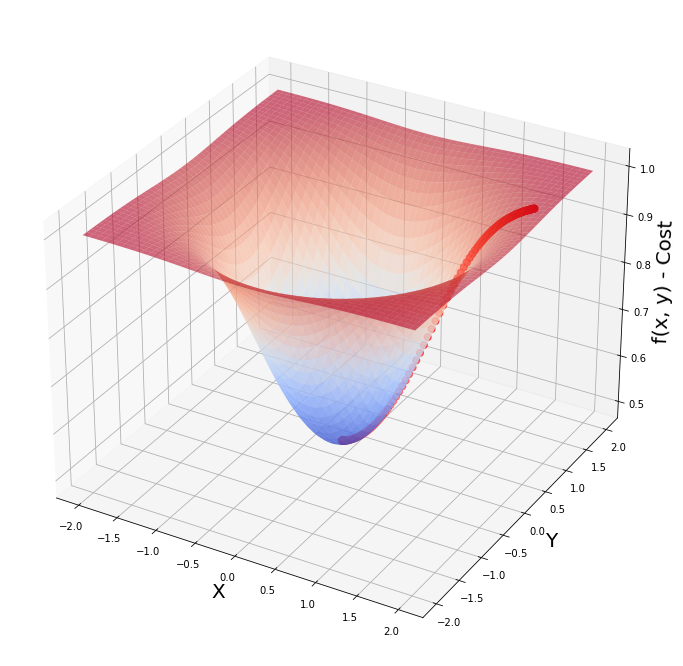

In [13]:
fig = plt.figure(figsize=[16, 12])
ax = fig.gca(projection='3d')
ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('f(x, y) - Cost', fontsize=20)
ax.plot_surface(x_4, y_4, f(x_4, y_4), cmap=cm.coolwarm, alpha=0.6)
ax.scatter(values_array[:, 0], values_array[:, 1], f(values_array[:, 0], values_array[:, 1]), s=50, color='red')

# Working with Data & a Real Cost Function
## Mean Squared Error: a cost fungtion for regression problems

### Residual Sum of Squares (RSS)
### $$RSS = \sum_{i=1}^{n} \big(y^{(i)} - h_\theta x^{(i)}\big)^2 $$

### Mean Squared Error (MSE)
### $$MSE = \frac{1}{n} \sum_{i=1}^{n} \big(y^{(i)} - h_\theta x^{(i)}\big)^2 $$
### $$MSE = \frac{1}{n} \sum_{i=1}^{n} \big(y - \hat y \big)^2 $$

In [40]:
# two ways to create two-dimensional array with 7 rows and 1 column
x = np.array([[0.1, 1.2, 2.4, 3.2, 4.1, 5.7, 6.5]]).transpose()
y = np.array([1.7, 2.4, 3.5, 3.0, 6.1, 9.4, 8.2]).reshape(7, 1)

print('Shape of x array:', x.shape)
print('Shape of x array:', y.shape)

Shape of x array: (7, 1)
Shape of x array: (7, 1)


In [41]:
# Quick linear regression
regression = LinearRegression()
regression.fit(x, y)
print('Theta 0:', regression.intercept_[0]) # OY axis intersection
print('Theta 1:', regression.coef_[0][0]) # Change in the response given a one unit change in the predictor

Theta 0: 0.8475351486029536
Theta 1: 1.2227264637835915


Text(0, 0.5, 'Y values')

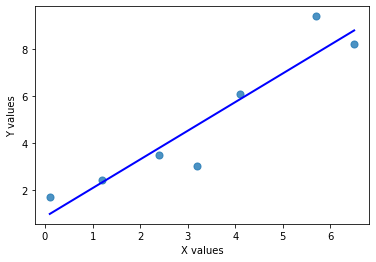

In [51]:
plt.scatter(x, y, s=50, alpha=0.8)
plt.plot(x, regression.predict(x), color='blue', linewidth=2)
plt.xlabel('X values')
plt.ylabel('Y values')

In [65]:
# y_hat = theta0 + theta1*x
y_hat = regression.intercept_[0] + regression.coef_[0][0] * x
print("Est values y_hat are | The actual y values are: \n")
for i, j in zip(y_hat, y):
    print(f"    {i}   --->   {j}\n")

Est values y_hat are | The actual y values are: 

    [0.96980779]   --->   [1.7]

    [2.31480691]   --->   [2.4]

    [3.78207866]   --->   [3.5]

    [4.76025983]   --->   [3.]

    [5.86071365]   --->   [6.1]

    [7.81707599]   --->   [9.4]

    [8.79525716]   --->   [8.2]



In [104]:
def mse(y, y_hat):
    #return sum((y-y_hat)**2)/y.size
    return np.average((y-y_hat)**2, axis=0)

print("Manually calculated MSE is: ", float(mse(y, y_hat)))
print("MSE regression using sklearn is: ", round(float(mean_squared_error(y, regression.predict(x))), 7))

Manually calculated MSE is:  0.9479656
MSE regression using sklearn is:  0.9479656
